# SIADS591 - Milestone I - Project
## Exploring the Factors Impacting a Movie's Profitability
Team Members:
Charith Tammineedi ( charith@umich.edu ), Carlo Tak ( carlotak@umich.edu )
### Machine Learning  - Data Exploration

The needed libraries are imported:

In [1]:
import utilities as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We declare some variables that will be used throught this notebook.

In [2]:
BUDGET_THRESHOLD = 1000000             # Larger values reduce the data set size
PROFITABILITY_THRESHOLD = 2.0        # Larger values increase the data set size
PROFITABILITY_CLASS_THRESHOLD = 0.24
RND_ST = 2854 # random state

# Colors
RED_1 = "#e9292f"
RED_2 = "#bb2326"
RED_3 = "#8c0c04"
RED_4 = "#690902"
RED_5 = "#410601"
RED_6 = "#340400"

The prepared data is imported:

In [3]:
save_dir = "../../Output/"
imdb_dummies_df = pd.read_csv(save_dir + "imdb_dummies_df_2020_09_24.csv", sep="|")
print("imdb_dummies_df.shape :", imdb_dummies_df.shape)
cols = list(imdb_dummies_df.columns)
print("cols :", cols[:10])
imdb_dummies_df.head(5)

imdb_dummies_df.shape : (4782, 29515)
cols : ['tconst', 'primaryTitle', 'originalTitle', 'startYear', 'imdb_id', 'revenue', 'budget', 'runtime', 'release_date', 'popularity']


,tconst,primaryTitle,originalTitle,startYear,imdb_id,revenue,budget,runtime,release_date,popularity,director__A.R. Murugadoss,director__Aanand L. Rai,director__Aaron Blaise,director__Aaron Horvath,director__Aaron Katz,director__Aaron Norris,director__Aaron Seltzer,director__Aaron Sorkin,director__Aashiq Abu,director__Abbas Alibhai Burmawalla,director__Abbas Tyrewala,director__Abby Kohn,director__Abderrahmane Sissako,director__Abel Ferrara,director__Abhinay Deo,director__Abhishek Chaubey,director__Abhishek Varman,director__Abrid Shine,director__Adam Green,director__Adam Marcus,director__Adam McKay,director__Adam Rifkin,director__Adam Robitel,director__Adam Salky,director__Adam Sanderson,director__Adam Shankman,director__Adam Simon,director__Adam Wingard,director__Aditya Chopra,director__Aditya Kolli,director__Adrian Lyne,director__Adrian Molina,director__Adrienne Shelly,director__Advait Chandan,director__Afia Nathaniel,director__Agnieszka Holland,director__Agnieszka Smoczynska,director__Agnieszka Wojtowicz-Vosloo,director__Agustín Díaz Yanes,director__Ahathian,director__Akira Kurosawa,director__Akiva Goldsman,director__Akiva Schaffer,director__Akshat Verma,director__Akshay Roy,director__Al Corley,director__Alaa Sheikh Hassan,director__Alain Chabat,director__Alan J. Pakula,director__Alan Johnson,director__Alan Mak,director__Alan Metter,director__Alan Myerson,director__Alan Pao,director__Alan Parker,director__Alan Shapiro,director__Alan Smithee,director__Alan Taylor,director__Alastair Fothergill,director__Albert Hughes,director__Albert Magnoli,director__Albert Pyun,director__Alberto Rodríguez,director__Alberto Sciamma,director__Alec Berg,director__Alejandro Amenábar,director__Alejandro G. Iñárritu,director__Alejandro Monteverde,director__Alejandro Romeo,director__Alejo Crisóstomo,director__Aleksander Bach,director__Aleksandr Karpilovskiy,director__Aleksandr Kott,director__Aleksandr Vartanov,director__Aleksey German,director__Aleksey Mizgiryov,director__Aleksey Pimanov,director__Aleksey Sidorov,director__Aleksey Uchitel,director__Alessandro Carloni,director__Alessandro Genovesi,director__Alex Cox,director__Alex Garland,director__Alex Gibney,director__Alex Kendrick,director__Alex Kurtzman,director__Alex Proyas,director__Alex Rivera,director__Alex Winter,director__Alexander Nevsky,director__Alexander Payne,director__Alexander Witt,director__Alexandre Aja,director__Alexandre Avancini,director__Alexandre Rockwell,director__Alfonso Arau,director__Alfonso Cuarón,director__Ali Abbas Zafar,director__Allan A. Goldstein,director__Allan Arkush,director__Allen Coulter,director__Allen Hughes,director__Allison Anders,director__Alphonse Puthren,director__Aman Chang,director__Amma Asante,director__Amol Palekar,director__Amy Heckerling,director__Ana Lily Amirpour,director__Anand Tucker,director__Andrea Arnold,director__Andrea Dalla Costa,director__Andrea Di Stefano,director__Andrew Adamson,director__Andrew Bergman,director__Andrew Currie,director__Andrew Davis,director__Andrew Dominik,director__Andrew Douglas,director__Andrew Erwin,director__Andrew Fleming,director__Andrew Haigh,director__Andrew Hyatt,director__Andrew Lau,director__Andrew Mogel,director__Andrew Niccol,director__Andrew Sipes,director__Andrew Solt,director__Andrew Stanton,director__Andrew Traucki,director__Andrey Konchalovskiy,director__Andrey Kravchuk,director__Andrey Zvyagintsev,director__Andrzej Bartkowiak,director__Andrzej Wajda,director__André van Heerden,director__Andrés Wood,director__Andy Cadiff,director__Andy Fickman,director__Andy Muschietti,director__Andy Tennant,director__Andy Wilson,director__Anees Bazmee,director__Aneesh Chaganty,director__Ang Lee,director__Angela Robinson,director__Angelina Jolie,director__Angus MacLane,director__Aniruddha Roy Chowdhury,director__Anjali Menon,director__Anna Boden,director__Anna Foerster,director__Anne Fletcher,director__Anne Fontaine,director__Anne Sewitsky,director__Anthony Bell,director__Anthony Hemingway,director__Anthony Hickox,di

### Revenue and Budget

A movie's budget and revenue are the numeric values that will be used to create the output, that we wish to predict. This could be a continuous variable or a categorical variable. but, this will be created from these two numeric values. Let's see what the budget and revenue for this data set looks like.

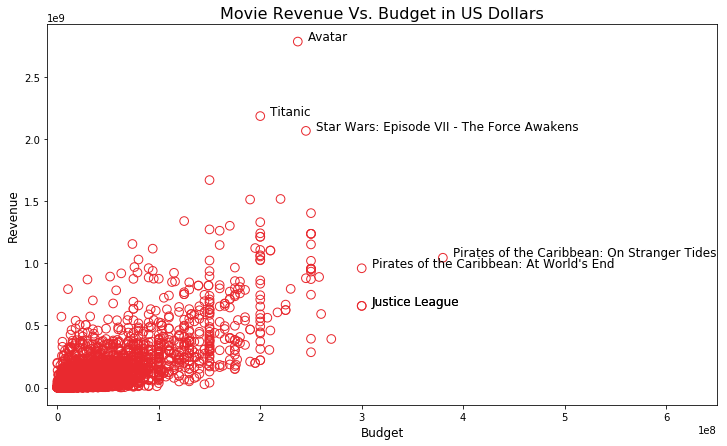

In [5]:
annotations = imdb_dummies_df[(imdb_dummies_df["revenue"] > 2000000000) | \
                              (imdb_dummies_df["budget"] > 270000000)] 
annotations = annotations[["originalTitle", "budget", "revenue"]].values

plt.figure(figsize=(12,7))
plt.scatter(imdb_dummies_df["budget"], imdb_dummies_df["revenue"], marker="o", edgecolors=RED_1, facecolors="none", 
            s=[75]*len(imdb_dummies_df["budget"]))
plt.xlabel("Budget", fontsize=12)
plt.xlim(-10000000, 650000000)
plt.ylabel("Revenue", fontsize=12)
plt.title("Movie Revenue Vs. Budget in US Dollars", fontsize=16)
for title, bud, rev in annotations:
    plt.annotate(title, xy=(bud+10000000, rev+10000000), fontsize=12)

plt.savefig(save_dir + "/Budget_vs_Revenue.png")

# print("annotations.shape :", annotations.shape)
# annotations

The scatter plot of the revenue and budget per movie shows that there are many movies in the bottom left corner of the graph, indicating a low budget and low revenue. There are movies that occur more to the right of the graph (higher budget) and movies that occur higher up on the graph (higher revenue). Some of the movies that had high budget or high revenue are labelled. Movies like 'Avatar', 'Titanic' , and 'Justice League' appear.

In [6]:
budget_revenue_corr = imdb_dummies_df.copy()
budget_revenue_corr = budget_revenue_corr[["budget", "revenue", "runtime", "popularity"]].corr()
budget_revenue_corr

,budget,revenue,runtime,popularity
budget,1.000000,0.744688,0.216837,0.592583
revenue,0.744688,1.000000,0.205767,0.671336
runtime,0.216837,0.205767,1.000000,0.105555
popularity,0.592583,0.671336,0.105555,1.000000


A mild correlation exists between budget and revenue. So, in general as the revenue values get larger the budget value get larger too. This brings up a question: **would we know the budget when we want to predict the revenue, or are do we intend to predict the revenue just from features like actors and directors?** This will be kept in mind. But now let's also see what sort of correlations might exist between budget and revenue and the features.

We define a function that will return correlation values of interest - that can be filtered by a threshold value and a possible string value (e.g. 'revenue', 'budget').

In [7]:
def get_corr_values_above_threshold(corr_df, threshold_lower=0.5, threshold_upper=1.0, filter_values=None):
    corr_values = corr_df.values
    corr_dict = {}
    corr_labels = list(corr_df.columns)
    for row_idx in range(0, len(corr_labels)):
        for col_idx in range(0, len(corr_labels)):
            if corr_labels[row_idx] != corr_labels[col_idx]:
                if (corr_labels[row_idx], corr_labels[col_idx]) not in corr_dict.keys() and \
                    (corr_labels[col_idx], corr_labels[row_idx]) not in corr_dict.keys():
                    # corr_dict[(corr_labels[row_idx], corr_labels[col_idx])] = corr_values[row_idx, col_idx]
                    corr_dict[(corr_labels[col_idx], corr_labels[row_idx])] = corr_values[row_idx, col_idx]

    corr_dict_filtered_first = {}
    for key, value in corr_dict.items():
        if threshold_lower < value and value < threshold_upper:
            corr_dict_filtered_first[key] = value
    
    if filter_values:
        corr_dict_filtered_again = {}
        for (key1, key2), value in corr_dict_filtered_first.items():
            if (any(x in key1 for x in filter_values)) or (any(x in key2 for x in filter_values)) :
                corr_dict_filtered_again[(key1, key2)] = value
        corr_dict_filtered = corr_dict_filtered_again
    else:
        corr_dict_filtered = corr_dict_filtered_first
        
    return corr_dict_filtered

The correlations seem to have a lot of low values, and the correlationmatrix will be very large, so we filter out the low values and only check the features that have a correlation coefficient larger than a threshold value.

In [8]:
print("imdb_dummies_df.shape :", imdb_dummies_df.shape)
plot_df = imdb_dummies_df.copy()

plot_df["startYear"] = plot_df["startYear"].astype(int).astype(str)
plot_df["profitability"] = (plot_df["revenue"] -  plot_df["budget"]) / plot_df["budget"]
plot_df["release_date_month_no"] = pd.DatetimeIndex(plot_df["release_date"]).month
plot_df["release_date_month_str"] = pd.DatetimeIndex(plot_df["release_date"]).strftime("%b")
plot_df["release_date_year_month"] = pd.DatetimeIndex(plot_df["release_date"]).strftime("%Y-%b")
plot_df["release_date_year"] = pd.DatetimeIndex(plot_df["release_date"]).strftime("%Y")

plot_df.set_index("tconst", inplace=True)
plot_df.head()

imdb_dummies_df.shape : (4782, 29515)


,primaryTitle,originalTitle,startYear,imdb_id,revenue,budget,runtime,release_date,popularity,director__A.R. Murugadoss,director__Aanand L. Rai,director__Aaron Blaise,director__Aaron Horvath,director__Aaron Katz,director__Aaron Norris,director__Aaron Seltzer,director__Aaron Sorkin,director__Aashiq Abu,director__Abbas Alibhai Burmawalla,director__Abbas Tyrewala,director__Abby Kohn,director__Abderrahmane Sissako,director__Abel Ferrara,director__Abhinay Deo,director__Abhishek Chaubey,director__Abhishek Varman,director__Abrid Shine,director__Adam Green,director__Adam Marcus,director__Adam McKay,director__Adam Rifkin,director__Adam Robitel,director__Adam Salky,director__Adam Sanderson,director__Adam Shankman,director__Adam Simon,director__Adam Wingard,director__Aditya Chopra,director__Aditya Kolli,director__Adrian Lyne,director__Adrian Molina,director__Adrienne Shelly,director__Advait Chandan,director__Afia Nathaniel,director__Agnieszka Holland,director__Agnieszka Smoczynska,director__Agnieszka Wojtowicz-Vosloo,director__Agustín Díaz Yanes,director__Ahathian,director__Akira Kurosawa,director__Akiva Goldsman,director__Akiva Schaffer,director__Akshat Verma,director__Akshay Roy,director__Al Corley,director__Alaa Sheikh Hassan,director__Alain Chabat,director__Alan J. Pakula,director__Alan Johnson,director__Alan Mak,director__Alan Metter,director__Alan Myerson,director__Alan Pao,director__Alan Parker,director__Alan Shapiro,director__Alan Smithee,director__Alan Taylor,director__Alastair Fothergill,director__Albert Hughes,director__Albert Magnoli,director__Albert Pyun,director__Alberto Rodríguez,director__Alberto Sciamma,director__Alec Berg,director__Alejandro Amenábar,director__Alejandro G. Iñárritu,director__Alejandro Monteverde,director__Alejandro Romeo,director__Alejo Crisóstomo,director__Aleksander Bach,director__Aleksandr Karpilovskiy,director__Aleksandr Kott,director__Aleksandr Vartanov,director__Aleksey German,director__Aleksey Mizgiryov,director__Aleksey Pimanov,director__Aleksey Sidorov,director__Aleksey Uchitel,director__Alessandro Carloni,director__Alessandro Genovesi,director__Alex Cox,director__Alex Garland,director__Alex Gibney,director__Alex Kendrick,director__Alex Kurtzman,director__Alex Proyas,director__Alex Rivera,director__Alex Winter,director__Alexander Nevsky,director__Alexander Payne,director__Alexander Witt,director__Alexandre Aja,director__Alexandre Avancini,director__Alexandre Rockwell,director__Alfonso Arau,director__Alfonso Cuarón,director__Ali Abbas Zafar,director__Allan A. Goldstein,director__Allan Arkush,director__Allen Coulter,director__Allen Hughes,director__Allison Anders,director__Alphonse Puthren,director__Aman Chang,director__Amma Asante,director__Amol Palekar,director__Amy Heckerling,director__Ana Lily Amirpour,director__Anand Tucker,director__Andrea Arnold,director__Andrea Dalla Costa,director__Andrea Di Stefano,director__Andrew Adamson,director__Andrew Bergman,director__Andrew Currie,director__Andrew Davis,director__Andrew Dominik,director__Andrew Douglas,director__Andrew Erwin,director__Andrew Fleming,director__Andrew Haigh,director__Andrew Hyatt,director__Andrew Lau,director__Andrew Mogel,director__Andrew Niccol,director__Andrew Sipes,director__Andrew Solt,director__Andrew Stanton,director__Andrew Traucki,director__Andrey Konchalovskiy,director__Andrey Kravchuk,director__Andrey Zvyagintsev,director__Andrzej Bartkowiak,director__Andrzej Wajda,director__André van Heerden,director__Andrés Wood,director__Andy Cadiff,director__Andy Fickman,director__Andy Muschietti,director__Andy Tennant,director__Andy Wilson,director__Anees Bazmee,director__Aneesh Chaganty,director__Ang Lee,director__Angela Robinson,director__Angelina Jolie,director__Angus MacLane,director__Aniruddha Roy Chowdhury,director__Anjali Menon,director__Anna Boden,director__Anna Foerster,director__Anne Fletcher,director__Anne Fontaine,director__Anne Sewitsky,director__Anthony Bell,director__Anthony Hemingway,director__Anthony Hickox,director_

We look at what the new variable (profitability) looks like in our data sets.

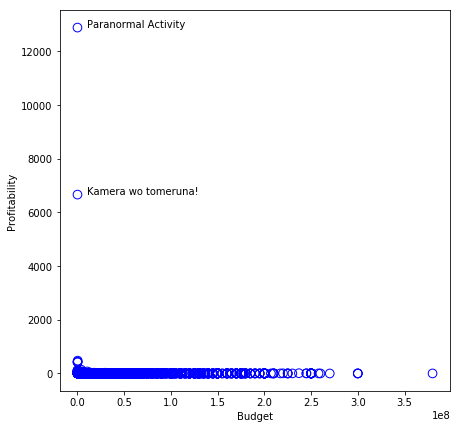

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(plot_df["budget"], plot_df["profitability"], marker="o", edgecolors="blue", facecolors="none", 
           s=[75]*len(plot_df["budget"]))
plt.ylabel("Profitability")
plt.xlabel("Budget")

annotations = plot_df[plot_df["profitability"] > 6000]
annotations = annotations[["originalTitle", "budget", "profitability"]].values
for title, bud, prof in annotations:
    plt.annotate(title, xy=(bud+10000000, prof))

plt.savefig(save_dir + "/Profitability_initial.png")

# annotations

There are two notable cases of very low budget but very high profitability, when compared to the rest of the points.

In [10]:
low_budget_values = plot_df[plot_df["budget"] <= BUDGET_THRESHOLD] \
                        .sort_values(["budget", "profitability"], ascending=[False, False])
print("low_budget_values.shape :", low_budget_values.shape)
low_budget_values.head()

low_budget_values.shape : (281, 29519)


,primaryTitle,originalTitle,startYear,imdb_id,revenue,budget,runtime,release_date,popularity,director__A.R. Murugadoss,director__Aanand L. Rai,director__Aaron Blaise,director__Aaron Horvath,director__Aaron Katz,director__Aaron Norris,director__Aaron Seltzer,director__Aaron Sorkin,director__Aashiq Abu,director__Abbas Alibhai Burmawalla,director__Abbas Tyrewala,director__Abby Kohn,director__Abderrahmane Sissako,director__Abel Ferrara,director__Abhinay Deo,director__Abhishek Chaubey,director__Abhishek Varman,director__Abrid Shine,director__Adam Green,director__Adam Marcus,director__Adam McKay,director__Adam Rifkin,director__Adam Robitel,director__Adam Salky,director__Adam Sanderson,director__Adam Shankman,director__Adam Simon,director__Adam Wingard,director__Aditya Chopra,director__Aditya Kolli,director__Adrian Lyne,director__Adrian Molina,director__Adrienne Shelly,director__Advait Chandan,director__Afia Nathaniel,director__Agnieszka Holland,director__Agnieszka Smoczynska,director__Agnieszka Wojtowicz-Vosloo,director__Agustín Díaz Yanes,director__Ahathian,director__Akira Kurosawa,director__Akiva Goldsman,director__Akiva Schaffer,director__Akshat Verma,director__Akshay Roy,director__Al Corley,director__Alaa Sheikh Hassan,director__Alain Chabat,director__Alan J. Pakula,director__Alan Johnson,director__Alan Mak,director__Alan Metter,director__Alan Myerson,director__Alan Pao,director__Alan Parker,director__Alan Shapiro,director__Alan Smithee,director__Alan Taylor,director__Alastair Fothergill,director__Albert Hughes,director__Albert Magnoli,director__Albert Pyun,director__Alberto Rodríguez,director__Alberto Sciamma,director__Alec Berg,director__Alejandro Amenábar,director__Alejandro G. Iñárritu,director__Alejandro Monteverde,director__Alejandro Romeo,director__Alejo Crisóstomo,director__Aleksander Bach,director__Aleksandr Karpilovskiy,director__Aleksandr Kott,director__Aleksandr Vartanov,director__Aleksey German,director__Aleksey Mizgiryov,director__Aleksey Pimanov,director__Aleksey Sidorov,director__Aleksey Uchitel,director__Alessandro Carloni,director__Alessandro Genovesi,director__Alex Cox,director__Alex Garland,director__Alex Gibney,director__Alex Kendrick,director__Alex Kurtzman,director__Alex Proyas,director__Alex Rivera,director__Alex Winter,director__Alexander Nevsky,director__Alexander Payne,director__Alexander Witt,director__Alexandre Aja,director__Alexandre Avancini,director__Alexandre Rockwell,director__Alfonso Arau,director__Alfonso Cuarón,director__Ali Abbas Zafar,director__Allan A. Goldstein,director__Allan Arkush,director__Allen Coulter,director__Allen Hughes,director__Allison Anders,director__Alphonse Puthren,director__Aman Chang,director__Amma Asante,director__Amol Palekar,director__Amy Heckerling,director__Ana Lily Amirpour,director__Anand Tucker,director__Andrea Arnold,director__Andrea Dalla Costa,director__Andrea Di Stefano,director__Andrew Adamson,director__Andrew Bergman,director__Andrew Currie,director__Andrew Davis,director__Andrew Dominik,director__Andrew Douglas,director__Andrew Erwin,director__Andrew Fleming,director__Andrew Haigh,director__Andrew Hyatt,director__Andrew Lau,director__Andrew Mogel,director__Andrew Niccol,director__Andrew Sipes,director__Andrew Solt,director__Andrew Stanton,director__Andrew Traucki,director__Andrey Konchalovskiy,director__Andrey Kravchuk,director__Andrey Zvyagintsev,director__Andrzej Bartkowiak,director__Andrzej Wajda,director__André van Heerden,director__Andrés Wood,director__Andy Cadiff,director__Andy Fickman,director__Andy Muschietti,director__Andy Tennant,director__Andy Wilson,director__Anees Bazmee,director__Aneesh Chaganty,director__Ang Lee,director__Angela Robinson,director__Angelina Jolie,director__Angus MacLane,director__Aniruddha Roy Chowdhury,director__Anjali Menon,director__Anna Boden,director__Anna Foerster,director__Anne Fletcher,director__Anne Fontaine,director__Anne Sewitsky,director__Anthony Bell,director__Anthony Hemingway,director__Anthony Hickox,director_

The budget of these records shows values that seem unreasonable. A judgement is made in the group to explicitly exclude records like this.
The rule is implemented below.

In [11]:
plot_df_clipped = plot_df.copy()
plot_df_clipped = plot_df_clipped[plot_df_clipped["budget"] > BUDGET_THRESHOLD]
plot_df_clipped.shape

(4501, 29519)

The previous graph is plotted again.

array([['Saw', 1200000.0, 85.5930575],
       ['Pirates of the Caribbean: On Stranger Tides', 380000000.0,
        1.7518784263157894],
       ['Fifty Shades of Grey', 4000000.0, 141.751532]], dtype=object)

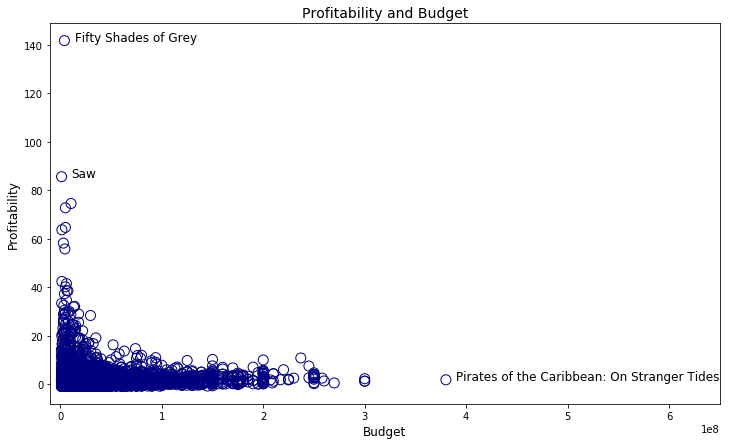

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(plot_df_clipped["budget"], plot_df_clipped["profitability"], marker="o", edgecolors="navy", facecolors='none', 
           s=[100]*len(plot_df_clipped["budget"]))
plt.xlim(-10000000, 650000000)
plt.title("Profitability and Budget", fontsize=14)
plt.ylabel("Profitability", fontsize=12)
plt.xlabel("Budget", fontsize=12)

annotations = plot_df_clipped[(plot_df_clipped["profitability"] > 80) | \
                              (plot_df_clipped["budget"] > 350000000)]
annotations = annotations[["originalTitle", "budget", "profitability"]].values
for title, bud, prof in annotations:
    plt.annotate(title, xy=(bud+10000000, prof), fontsize=12)
    
plt.savefig(save_dir + "/Profitability_clipped.png")

annotations

The profitability and budget graph shows that a large number of movies have relatively low profitability. A few movies are notable because they have a relatively high budget but relatively low profitability, like ‘Pirates of the Caribbean: On Stranger Tides’. Some movies have a relatively low budget but high profitability, like ‘Fifty Shades of Grey’ and ‘Saw’.

Let's look at the distribution of 'profitability'.

count     4782.000000
mean         7.024606
std        210.278559
min         -0.999999
25%         -0.256544
50%          0.888341
75%          2.843064
max      12889.386667
Name: profitability, dtype: float64

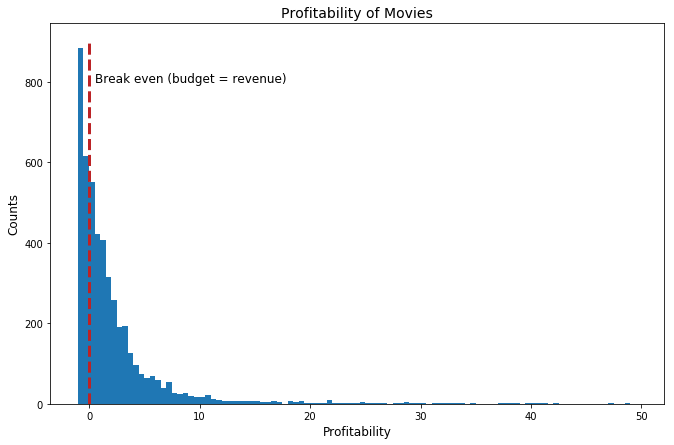

In [13]:
plt.figure(figsize=(11,7))
bins = np.arange(-1.0, 50.0, 0.5)
plt.hist(plot_df["profitability"], bins=bins)
plt.title("Profitability of Movies", fontsize=14)
plt.vlines(0.0, 0.0, 900, linestyle="--", color=RED_2, linewidth=3)
plt.text(0.5, 800.0, "Break even (budget = revenue)", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.xlabel("Profitability", fontsize=12)
# plt.savefig(save_dir + "/Profitability_initial.png")

plot_df["profitability"].describe()

The distribution has a long tail to the right, indicating a few movies with high profitability.
The red vertical line indicates the 0.0 profitability point, where the revenue equals the budget. Some movies are to the left of this line, indicating they were not profitable (i.e. the revenue was less than the budget).

A large number of movies occur between 0 and 10.

The relatively few examples so high profitability (greater than 10) might make the modeling of these types of movies difficult. Conversely, a large number of examples, which have profitability lower than 19 might be easier to model.

Text(0.5,0,'Profitability')

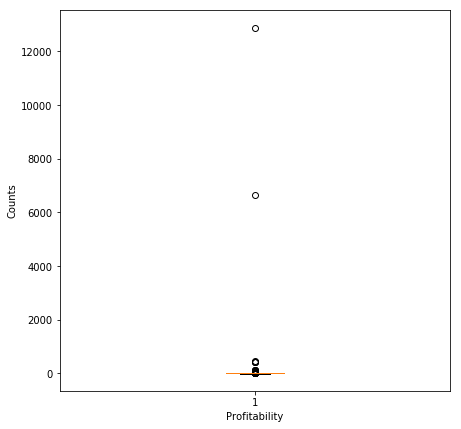

In [14]:
plt.figure(figsize=(7,7))
plt.boxplot(plot_df["profitability"])
plt.ylabel("Counts")
plt.xlabel("Profitability")

Text(0.5,0,'Profitability')

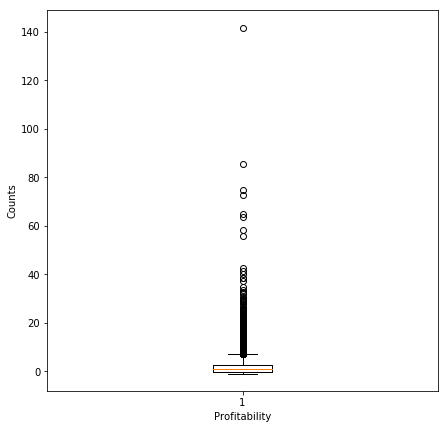

In [15]:
plt.figure(figsize=(7,7))
plt.boxplot(plot_df_clipped["profitability"])
plt.ylabel("Counts")
plt.xlabel("Profitability")

It is interesting to explore the effect of increasing the 'BUDGET_THRESHOLD' value has on this graph. Reducing the extreme values of profitability increases the seperation in data points and makes it easier to read.
No hard and fast rule will be adopted for the 'BUDGET_THRESHOLD' value. So, when doing the machine learning it will be keep as an option to also experiment with adjusting this threshold.

## Over Time

The relationship between the movies and time are examined.

In [16]:
plot_time_df_1 = plot_df.copy()
plot_time_df_1 = plot_time_df_1.groupby(["release_date_year"])["budget", "revenue"].sum().reset_index()
plot_time_df_1["number_movies"] = plot_time_df_1["release_date_year"].map(plot_df["release_date_year"].value_counts())
plot_time_df_1["profitability"] = (plot_time_df_1["revenue"] - plot_time_df_1["budget"]) / plot_time_df_1["budget"]

In [17]:
plot_time_df_1.head()

,release_date_year,budget,revenue,number_movies,profitability
0,1980,394000000.0,1.309078e+09,28,2.322532
1,1981,444106261.0,1.202836e+09,43,1.708442
2,1982,372900091.0,2.189850e+09,30,4.872483
3,1983,560422000.0,2.212991e+09,42,2.948795
4,1984,603911964.0,1.955013e+09,46,2.237248


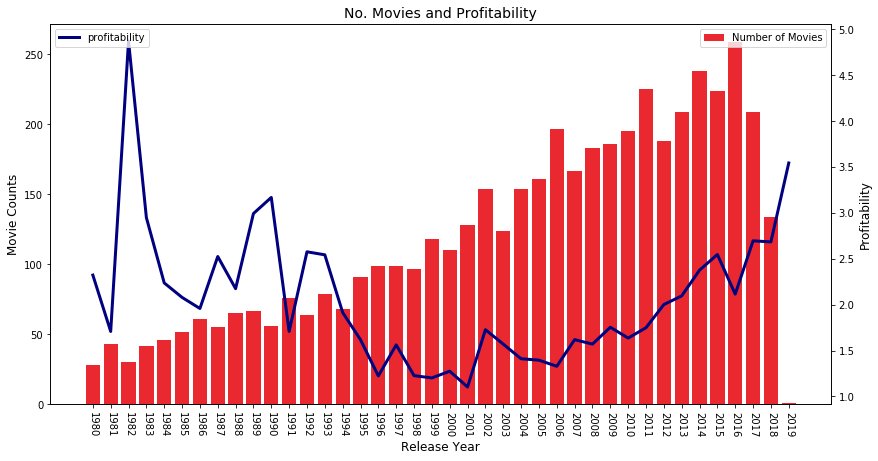

In [23]:
# plt.figure(figsize=(14,7))
fig, ax1 = plt.subplots(figsize=(14,7))
ax1.bar(plot_time_df_1["release_date_year"], plot_time_df_1["number_movies"], 
        label="Number of Movies", color=RED_1)

ax2 = ax1.twinx()
ax2.plot(plot_time_df_1["release_date_year"], plot_time_df_1["profitability"],
         linewidth=3.0, color="navy")

ax1.set_title("No. Movies and Profitability", fontsize=14)
ax1.set_ylabel("Movie Counts", fontsize=12)
ax2.set_ylabel("Profitability", fontsize=12)
ax1.set_xticklabels(plot_time_df_1["release_date_year"], rotation=-90)
ax1.set_xlabel("Release Year", fontsize=12)
ax1.legend(loc=1)
ax2.legend(loc=2)

Interestingly, there are more movies in this data set for more recent years. The year with the most movies was 2016, with over 250 movies.
Also, the profitability of the movies was higher in earlier years and decreased towards the year 2001. Then the profitability increases.
It should be kept in mind that these observations are for this data set, not necessarily for the entire movie industry. This is because we have given our best effort to assemble this data set, but there is no guarantee that it includes all movies.
Also, it is noted that there were no years that had negative profitability. So there might have been individual movies that made a loss (revenue less than budget), there were no years that had a loss.


Next we consider the revenue and budget of movies over time.

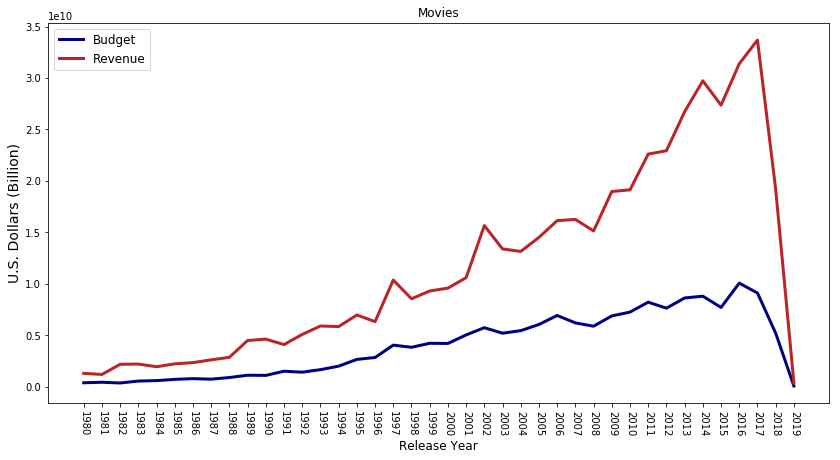

In [24]:
plt.figure(figsize=(14,7))
plt.plot(plot_time_df_1["release_date_year"], plot_time_df_1["budget"],
         linewidth=3.0, color="navy", label="Budget")
plt.plot(plot_time_df_1["release_date_year"], plot_time_df_1["revenue"],
         linewidth=3.0, color=RED_2, label="Revenue")
plt.title("Movies", fontsize=12)
plt.ylabel("U.S. Dollars (Billion)", fontsize=14)
plt.xticks(rotation=-90)
plt.xlabel("Release Year", fontsize=12)
plt.legend(loc=2, fontsize=12)

Interestingly, the budget and revenue have increased steadily over time. Up until 2019. It might be beneficial to investigate the year 2019.

In [40]:
plot_df[plot_df["release_date_year"]=="2019"]

,primaryTitle,originalTitle,startYear,imdb_id,revenue,budget,runtime,release_date,popularity,director__A.R. Murugadoss,director__Aanand L. Rai,director__Aaron Blaise,director__Aaron Horvath,director__Aaron Katz,director__Aaron Norris,director__Aaron Seltzer,director__Aaron Sorkin,director__Aashiq Abu,director__Abbas Alibhai Burmawalla,director__Abbas Tyrewala,director__Abby Kohn,director__Abderrahmane Sissako,director__Abel Ferrara,director__Abhinay Deo,director__Abhishek Chaubey,director__Abhishek Varman,director__Abrid Shine,director__Adam Green,director__Adam Marcus,director__Adam McKay,director__Adam Rifkin,director__Adam Robitel,director__Adam Salky,director__Adam Sanderson,director__Adam Shankman,director__Adam Simon,director__Adam Wingard,director__Aditya Chopra,director__Aditya Kolli,director__Adrian Lyne,director__Adrian Molina,director__Adrienne Shelly,director__Advait Chandan,director__Afia Nathaniel,director__Agnieszka Holland,director__Agnieszka Smoczynska,director__Agnieszka Wojtowicz-Vosloo,director__Agustín Díaz Yanes,director__Ahathian,director__Akira Kurosawa,director__Akiva Goldsman,director__Akiva Schaffer,director__Akshat Verma,director__Akshay Roy,director__Al Corley,director__Alaa Sheikh Hassan,director__Alain Chabat,director__Alan J. Pakula,director__Alan Johnson,director__Alan Mak,director__Alan Metter,director__Alan Myerson,director__Alan Pao,director__Alan Parker,director__Alan Shapiro,director__Alan Smithee,director__Alan Taylor,director__Alastair Fothergill,director__Albert Hughes,director__Albert Magnoli,director__Albert Pyun,director__Alberto Rodríguez,director__Alberto Sciamma,director__Alec Berg,director__Alejandro Amenábar,director__Alejandro G. Iñárritu,director__Alejandro Monteverde,director__Alejandro Romeo,director__Alejo Crisóstomo,director__Aleksander Bach,director__Aleksandr Karpilovskiy,director__Aleksandr Kott,director__Aleksandr Vartanov,director__Aleksey German,director__Aleksey Mizgiryov,director__Aleksey Pimanov,director__Aleksey Sidorov,director__Aleksey Uchitel,director__Alessandro Carloni,director__Alessandro Genovesi,director__Alex Cox,director__Alex Garland,director__Alex Gibney,director__Alex Kendrick,director__Alex Kurtzman,director__Alex Proyas,director__Alex Rivera,director__Alex Winter,director__Alexander Nevsky,director__Alexander Payne,director__Alexander Witt,director__Alexandre Aja,director__Alexandre Avancini,director__Alexandre Rockwell,director__Alfonso Arau,director__Alfonso Cuarón,director__Ali Abbas Zafar,director__Allan A. Goldstein,director__Allan Arkush,director__Allen Coulter,director__Allen Hughes,director__Allison Anders,director__Alphonse Puthren,director__Aman Chang,director__Amma Asante,director__Amol Palekar,director__Amy Heckerling,director__Ana Lily Amirpour,director__Anand Tucker,director__Andrea Arnold,director__Andrea Dalla Costa,director__Andrea Di Stefano,director__Andrew Adamson,director__Andrew Bergman,director__Andrew Currie,director__Andrew Davis,director__Andrew Dominik,director__Andrew Douglas,director__Andrew Erwin,director__Andrew Fleming,director__Andrew Haigh,director__Andrew Hyatt,director__Andrew Lau,director__Andrew Mogel,director__Andrew Niccol,director__Andrew Sipes,director__Andrew Solt,director__Andrew Stanton,director__Andrew Traucki,director__Andrey Konchalovskiy,director__Andrey Kravchuk,director__Andrey Zvyagintsev,director__Andrzej Bartkowiak,director__Andrzej Wajda,director__André van Heerden,director__Andrés Wood,director__Andy Cadiff,director__Andy Fickman,director__Andy Muschietti,director__Andy Tennant,director__Andy Wilson,director__Anees Bazmee,director__Aneesh Chaganty,director__Ang Lee,director__Angela Robinson,director__Angelina Jolie,director__Angus MacLane,director__Aniruddha Roy Chowdhury,director__Anjali Menon,director__Anna Boden,director__Anna Foerster,director__Anne Fletcher,director__Anne Fontaine,director__Anne Sewitsky,director__Anthony Bell,director__Anthony Hemingway,director__Anthony Hickox,director_

The fact that only one move from 2019 appears in this data set appears to be an artifact of the data collection process - it appears that more time is needed to accumulate revenue (this write up was done in September 2020).

## Correlations

We check correlations for a small sample of the features (columns).

In [41]:
corr_df = imdb_dummies_df.copy()

corr_df["startYear"] = corr_df["startYear"].astype(int).astype(str)
corr_df["profitability"] = (corr_df["revenue"] -  corr_df["budget"]) / corr_df["budget"]
corr_df = corr_df.drop(["primaryTitle", "originalTitle", "imdb_id"], axis="columns")
corr_df.set_index("tconst", inplace=True)
corr_cols = list(corr_df.columns)
corr_cols.remove("profitability")
corr_cols_len = len(corr_cols)
corr_df.shape

(4782, 29512)

In [ ]:
corr_df_clipped = corr_df.copy()
corr_df_clipped = corr_df_clipped[corr_df_clipped["budget"] > BUDGET_THRESHOLD]
corr_df_clipped.shape

In [ ]:
corr_df_temp = corr_df_clipped.copy()
drop_cols = corr_cols[-1 * (corr_cols_len - 10):]
corr_df_temp = corr_df_temp.drop(drop_cols, axis=1)
corr_df_temp.head()
print("list(corr_df_temp.columns)[-5:] :", list(corr_df_temp.columns)[:])
correlation_matrix = corr_df_temp.corr(method="pearson")
correlation_matrix
high_corr_values = get_corr_values_above_threshold(corr_df=correlation_matrix, threshold_lower=0.5, threshold_upper=1.0)

high_corr_values

Some correlations come through on the small sample. Next we try a larger sample.

In [ ]:
corr_df_temp = corr_df_clipped.copy()
# corr_df_temp = corr_df_temp.sample(frac=0.001, random_state=RND_ST)
drop_cols = corr_cols[-1 * (corr_cols_len - 10000):]
corr_df_temp = corr_df_temp.drop(drop_cols, axis=1)
corr_df_temp.head()

print("list(corr_df_temp.columns)[-5:] :", list(corr_df_temp.columns)[-10:])
print("corr_df_temp.shape :", corr_df_temp.shape)
correlation_matrix = corr_df_temp.corr(method="pearson")
correlation_matrix
high_corr_values = get_corr_values_above_threshold(corr_df=correlation_matrix, threshold_lower=0.6, threshold_upper=1.1, 
                                                   filter_values=['budget', 'revenue', 'profitability'])

high_corr_values

In [ ]:
corr_df_temp

This shows that there is some correlation between certain principals and profitability.
Next we will try to train a machine learning model on these feature and see if the profitability can be reliably predicted.

In [ ]:
# imdb_dummies_df["startYear"] = imdb_dummies_df["startYear"].astype(int).astype(str)
# imdb_dummies_df.drop(["primaryTitle", "originalTitle", "imdb_id", "revenue", "budget"], axis="columns", inplace=True)
# imdb_dummies_df.set_index("tconst", inplace=True)
# print(imdb_dummies_df[list(imdb_dummies_df.columns)[:5]].head())

## Classification (Profitable - Not Profitable)

The features that have been assembled for this project, so far, are by no means exhaustive. Many other features could be incorporated into this project. Things like actor specific metrics (e.g. past actor revenue, past actor number of movies), and interaction metrics (e.g. number of movies the people have worked on in common in the past, studios and actor combinations). For this project, it was decided to limit the extent of the features because of time constraints.

Taking this into account, it was decided to also construct a classification model from this data set. The hope is that a classifier might be more useful than a regression model because it would allow us to bin records (i.e. profitable movies, non-profitable movies).


The 'profitable' feature is created. It is encoded as '0' for not profitable movies (less than or equal to the threshold) and '1' for profitable movies (greater than the threshold). The threshold value is held in the variable 'PROFITABILITY_CLASS_THRESHOLD'.

In [42]:
PROFITABILITY_CLASS_THRESHOLD = 0.24

In [43]:
class_df = plot_df.copy()

class_df["profitable"] = np.where(class_df["profitability"] > PROFITABILITY_CLASS_THRESHOLD, 1, 0)
class_df.head()

,primaryTitle,originalTitle,startYear,imdb_id,revenue,budget,runtime,release_date,popularity,director__A.R. Murugadoss,director__Aanand L. Rai,director__Aaron Blaise,director__Aaron Horvath,director__Aaron Katz,director__Aaron Norris,director__Aaron Seltzer,director__Aaron Sorkin,director__Aashiq Abu,director__Abbas Alibhai Burmawalla,director__Abbas Tyrewala,director__Abby Kohn,director__Abderrahmane Sissako,director__Abel Ferrara,director__Abhinay Deo,director__Abhishek Chaubey,director__Abhishek Varman,director__Abrid Shine,director__Adam Green,director__Adam Marcus,director__Adam McKay,director__Adam Rifkin,director__Adam Robitel,director__Adam Salky,director__Adam Sanderson,director__Adam Shankman,director__Adam Simon,director__Adam Wingard,director__Aditya Chopra,director__Aditya Kolli,director__Adrian Lyne,director__Adrian Molina,director__Adrienne Shelly,director__Advait Chandan,director__Afia Nathaniel,director__Agnieszka Holland,director__Agnieszka Smoczynska,director__Agnieszka Wojtowicz-Vosloo,director__Agustín Díaz Yanes,director__Ahathian,director__Akira Kurosawa,director__Akiva Goldsman,director__Akiva Schaffer,director__Akshat Verma,director__Akshay Roy,director__Al Corley,director__Alaa Sheikh Hassan,director__Alain Chabat,director__Alan J. Pakula,director__Alan Johnson,director__Alan Mak,director__Alan Metter,director__Alan Myerson,director__Alan Pao,director__Alan Parker,director__Alan Shapiro,director__Alan Smithee,director__Alan Taylor,director__Alastair Fothergill,director__Albert Hughes,director__Albert Magnoli,director__Albert Pyun,director__Alberto Rodríguez,director__Alberto Sciamma,director__Alec Berg,director__Alejandro Amenábar,director__Alejandro G. Iñárritu,director__Alejandro Monteverde,director__Alejandro Romeo,director__Alejo Crisóstomo,director__Aleksander Bach,director__Aleksandr Karpilovskiy,director__Aleksandr Kott,director__Aleksandr Vartanov,director__Aleksey German,director__Aleksey Mizgiryov,director__Aleksey Pimanov,director__Aleksey Sidorov,director__Aleksey Uchitel,director__Alessandro Carloni,director__Alessandro Genovesi,director__Alex Cox,director__Alex Garland,director__Alex Gibney,director__Alex Kendrick,director__Alex Kurtzman,director__Alex Proyas,director__Alex Rivera,director__Alex Winter,director__Alexander Nevsky,director__Alexander Payne,director__Alexander Witt,director__Alexandre Aja,director__Alexandre Avancini,director__Alexandre Rockwell,director__Alfonso Arau,director__Alfonso Cuarón,director__Ali Abbas Zafar,director__Allan A. Goldstein,director__Allan Arkush,director__Allen Coulter,director__Allen Hughes,director__Allison Anders,director__Alphonse Puthren,director__Aman Chang,director__Amma Asante,director__Amol Palekar,director__Amy Heckerling,director__Ana Lily Amirpour,director__Anand Tucker,director__Andrea Arnold,director__Andrea Dalla Costa,director__Andrea Di Stefano,director__Andrew Adamson,director__Andrew Bergman,director__Andrew Currie,director__Andrew Davis,director__Andrew Dominik,director__Andrew Douglas,director__Andrew Erwin,director__Andrew Fleming,director__Andrew Haigh,director__Andrew Hyatt,director__Andrew Lau,director__Andrew Mogel,director__Andrew Niccol,director__Andrew Sipes,director__Andrew Solt,director__Andrew Stanton,director__Andrew Traucki,director__Andrey Konchalovskiy,director__Andrey Kravchuk,director__Andrey Zvyagintsev,director__Andrzej Bartkowiak,director__Andrzej Wajda,director__André van Heerden,director__Andrés Wood,director__Andy Cadiff,director__Andy Fickman,director__Andy Muschietti,director__Andy Tennant,director__Andy Wilson,director__Anees Bazmee,director__Aneesh Chaganty,director__Ang Lee,director__Angela Robinson,director__Angelina Jolie,director__Angus MacLane,director__Aniruddha Roy Chowdhury,director__Anjali Menon,director__Anna Boden,director__Anna Foerster,director__Anne Fletcher,director__Anne Fontaine,director__Anne Sewitsky,director__Anthony Bell,director__Anthony Hemingway,director__Anthony Hickox,director_

c:\users\carlo\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


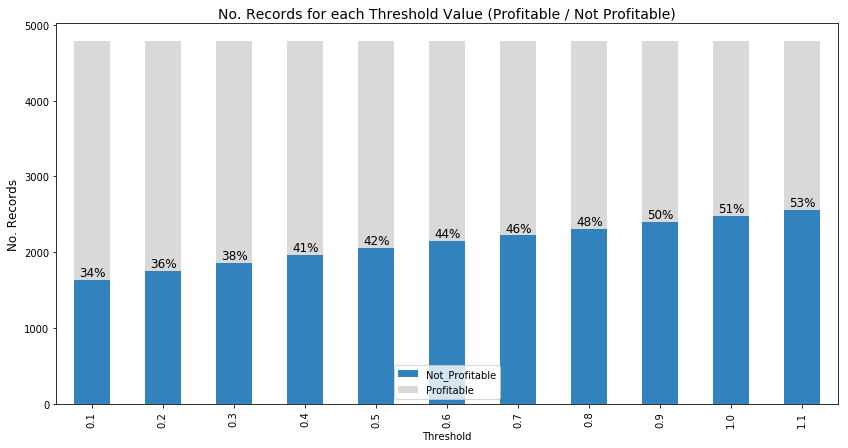

In [44]:
thresholds = np.arange(0.1, 1.0, 0.1)
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]

counts_list = []
for threshold in thresholds:
    temp_class, temp_counts = np.unique(np.where(class_df["profitability"] > threshold, 1, 0),
                                        return_counts=True)
    counts_list.append(temp_counts)

counts_array = np.array(counts_list)
counts_df = pd.DataFrame(data=counts_array, columns=["Not_Profitable", "Profitable"])
counts_df["Threshold"] = thresholds
counts_df["Percentage_not_profitable"] = (counts_df["Not_Profitable"] * 100.00 / (counts_df["Not_Profitable"] + counts_df["Profitable"])).astype(int).astype(str) + "%"

fig, ax = plt.subplots(figsize=(14,7))
ax.set_ylabel("No. Records", fontsize=12)
ax.set_title("No. Records for each Threshold Value (Profitable / Not Profitable)", fontsize=14)

counts_df.plot.bar(x="Threshold", y=["Not_Profitable", "Profitable"], ax=ax, stacked=True, xticks=thresholds, colormap="tab20c")

def adj_thresholds(threshold_value, threshold_pos):
    const = -1.18
    return const + (threshold_value * threshold_pos * 10)

threshold_pos = np.ones(len(thresholds))
thresholds_alt = [adj_thresholds(x, y) for x, y in zip(thresholds, threshold_pos)]
for x, y, text in zip(thresholds_alt, counts_df["Not_Profitable"], counts_df["Percentage_not_profitable"]):
    ax.text(x, y+50, text, fontsize=12)



The graph above shows how the balance of the classes will change based on what value of the threshold is used. 50% (perfectly balanced classes) can be seen to occur at a threshold of 0.9. For a higher threshold value, it can be seen that the class 'Profitable' becomes less than 50%.

At this point, any threshold value would be acceptable, because none of these threshold values would produce a very small class (about 10%) - a very small class (highly imbalanced classes) would make fitting a model more difficult.
